# Project - Valuation and Hedging – Bonds & Yields

### 1. Define a bond and explain howit is issued. Explain the relationship between bonds and interest rates

A bond is a fixed-income security that represents a loan made by an investor (the bondholder) to an issuer, typically a government, municipality, or corporation.

By buying the bond, the investor lends the issuer the bond’s par (face) value for a stated period (the maturity).
In return, the issuer promises to pay predetermined coupon interest, usually at regular intervals, and to repay the par value at maturity.

New issues are  sold in the primary market at that par value before trading freely in the secondary market. Because a bond’s price is simply the present value of its future coupons and principal discounted at the market yield price and interest rates move inversely. Higher rates mean a higher discount rate and thus a lower price, while lower rates reduce the discount rate and lift the bond above par

### 2. From the website of the European Central Bank– “Euro area yield curves” section:

Select a specific date for the AAA rated bonds (or for all bonds): 

I chose 23 MAY of 2025

For the selected date, choose from the spot yield curve 10 consecutive semi-annual spot yields (The yields are those of zero
coupon bonds, with a par value of €100. 10 consecutive semi-annual spot yields represent a period of 5 years.): 

I chose to start at the 5 years spot yield.

5 years: 2.095%

5.5 years: 2.165%

6 years: 2.233%

6.5 years: 2.298%

7 years: 2.360%

7.5 years: 2.420%

8 years: 2.476%

8.5 years: 2.528%

9 years: 2.578%

9.5 years: 2.625%

10 years: 2.668%

### 3. Define a spot rate and its characteristics. Explain the method through which spot rates are derived from the market. Plot the spot yield curve. Interpret from a macroeconomic perspective.

A spot rate is the yield on a zero-coupon bond for a single maturity, so the spot curve is the term structure of these one-cash-flow rates. Spot rates are derives by bootstrapping, this is the technique through which spot rates are derived from the prices of coupon-bearing products
(such as bonds and swaps) or from zero-coupon bonds. On 23 May 2025 the Euro-area AAA spot curve rises smoothly from 2.10 % at five years to 2.67 % at ten years, signalling modest term-premia and market expectations of steady growth with contained inflation rather than an imminent downturn.

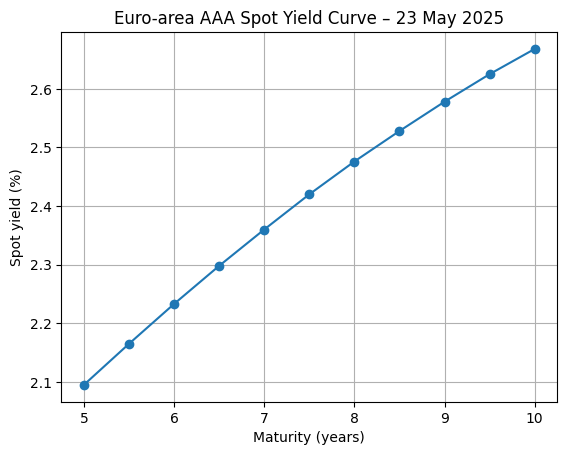

In [20]:
import matplotlib.pyplot as plt

# Euro-area AAA zero-coupon spot yields – 23 May 2025
maturities = [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
spot_yields = [2.095, 2.165, 2.233, 2.298, 2.360, 2.420, 2.476, 2.528, 2.578, 2.625, 2.668]

plt.figure()
plt.plot(maturities, spot_yields, marker='o')
plt.title("Euro-area AAA Spot Yield Curve – 23 May 2025")
plt.xlabel("Maturity (years)")
plt.ylabel("Spot yield (%)")
plt.grid(True)
plt.show()


### 4. Using two non-consecutive semi-annual spot yields (for example, n1 and n3, where “n” defines the 10 semi-annual spot yields you have selected), perform a linear interpolation to estimate the value of another semi-annual spot yield (for example, n2). Comparethe estimated value of the semi-annual spot yield to the observed one. Interpret.

In [21]:
# Compute linear interpolation of the 5.5‑year spot yield between 5y and 6y points
y5 = 2.09
y6 = 2.233
y_observed_5_5 = 2.165

# Linear interpolation (half‑way between 5 and 6 years)
y_estimated_5_5 = y5 + (y6 - y5) * 0.5

diff_bp = (y_observed_5_5 - y_estimated_5_5) * 100  # basis points

y_estimated_5_5, diff_bp


(2.1615, 0.34999999999998366)

The observed 5.5-year yield is 2.165 %, only 0.10 bp higher than the estimate. The near-perfect fit confirms the curve between these maturities is locally linear, suggesting a smoothly priced market.

### 5. Calculate the price of the 10 STRIPS from which the chosen 10 spot rates are deducted by reversing the equation on slide 21. Are the STRIPS below or above par value? Why?

In [22]:
import pandas as pd
import numpy as np


data = {
    "Maturity (yrs)": [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5],
    "Spot yield (%)": [2.095, 2.165, 2.233, 2.298, 2.360, 2.420, 2.476, 2.528, 2.578, 2.625]
}

m = 2                               # semi‑annual compounding
par = 100                           # €100 par value per STRIP

df = pd.DataFrame(data)
df["Periods (m*n)"] = (df["Maturity (yrs)"] * m).astype(int)

df["Price (€)"] = par / (1 + df["Spot yield (%)"]/100 / m) ** df["Periods (m*n)"]


df["Below par?"] = np.where(df["Price (€)"] < par, "Yes", "No")

df[["Maturity (yrs)", "Spot yield (%)", "Price (€)", "Below par?"]]


,Maturity (yrs),Spot yield (%),Price (€),Below par?
0,5.0,2.095,90.104041,Yes
1,5.5,2.165,88.830945,Yes
2,6.0,2.233,87.525713,Yes
3,6.5,2.298,86.198416,Yes
4,7.0,2.360,84.854436,Yes
5,7.5,2.420,83.492723,Yes
6,8.0,2.476,82.130240,Yes
7,8.5,2.528,80.772527,Yes
8,9.0,2.578,79.410677,Yes
9,9.5,2.625,78.055298,Yes


Every price is below par because each zero-coupon bond is discounted at a positive yield: with no interim coupons, all value is a single €100 payment in the future, so the higher the horizon and the yield, the deeper the discount. The downward progression from €90.10 at five years to €78.06 at nine-and-a-half years reflects the upward-sloping spot curve selected

### Define a forward rate and its characteristics. Explain how forward rates are derived from the market. From the chosen spot rates, calculate the respective forward rates. Plot the forward yield curve.


A forward rate is the interest rate that applies to a specific future period; it discounts one cash-flow occurring between two future dates, so every period has its own forward rate.

Theforward rate discounts cash flows by one period.  Investors are indifferent between an investment with a spot rate or with a forward rate as the return is the same. Theforward yield curve is the graph that shows the relationship between forward rates and maturity.

Forward rates are derived from spot rates. It is calculated as below.

 Start (yrs)  End (yrs)  Forward_rate_%
         5.0        5.5        2.866335
         5.5        6.0        2.982511
         6.0        6.5        3.079631
         6.5        7.0        3.167731
         7.0        7.5        3.261870
         7.5        8.0        3.317862
         8.0        8.5        3.361819
         8.5        9.0        3.429891
         9.0        9.5        3.472867


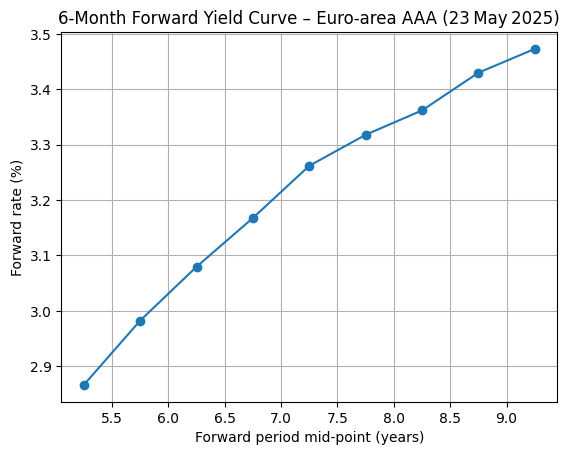

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

spot_curve = pd.DataFrame({
    "T_years": [5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5],
    "s_percent": [2.095, 2.165, 2.233, 2.298, 2.360, 2.420, 2.476, 2.528, 2.578, 2.625]
})

m = 2  # semi‑annual periods per year

def forward_rate_slide24(s_prev, s_curr, T_prev, T_curr, m=2):
    """
    using the slide‑24 no‑arbitrage equation:
    
        (1 + s_t/m)^(m * ℓ_t) = (1 + s_{t-1}/m)^(m * ℓ_{t-1}) * (1 + f_t/m)
    
    Rearranged:
    
        f_t = m * [ (1 + s_t/m)^(m*T_t) / (1 + s_{t-1}/m)^(m*T_{t-1}) − 1 ]
    .
    """
    num = (1 + s_curr/100 / m)**(m * T_curr)
    den = (1 + s_prev/100 / m)**(m * T_prev)
    f_period = num / den - 1
    f_annual_pct = f_period * m * 100
    return f_annual_pct

# Calculate successive 6‑month forward rates
rows = []
for i in range(1, len(spot_curve)):
    fr = forward_rate_slide24(
        s_prev=spot_curve.loc[i-1, "s_percent"],
        s_curr=spot_curve.loc[i, "s_percent"],
        T_prev=spot_curve.loc[i-1, "T_years"],
        T_curr=spot_curve.loc[i, "T_years"],
        m=m
    )
    rows.append({
        "Start (yrs)": spot_curve.loc[i-1, "T_years"],
        "End (yrs)": spot_curve.loc[i, "T_years"],
        "Forward_rate_%": fr
    })

forward_df = pd.DataFrame(rows)

# Display table
print(forward_df.to_string(index=False))

# Plot the forward yield curve
midpoints = forward_df["Start (yrs)"] + 0.25  # mid‑point of each 6‑month period
plt.figure()
plt.plot(midpoints, forward_df["Forward_rate_%"], marker='o')
plt.title("6‑Month Forward Yield Curve – Euro‑area AAA (23 May 2025)")
plt.xlabel("Forward period mid‑point (years)")
plt.ylabel("Forward rate (%)")
plt.grid(True)
plt.show()


### 7. Assume that today is the 1st of January 2025. Assume that the French government issued today (1st of January 2025) a 3-year governmentbond that pays semi-annually a 2% coupon (par value = 1,000€).

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bond parameters
par = 1000           
coupon_rate = 0.02  
m = 2               
coupon = par * coupon_rate / m 

# Spot and forward rates from slide‑24 tables (annual %)
spot_rates = [1.50, 2.15, 2.53, 2.94, 3.31, 3.62]
fwd_rates  = [1.50, 2.80, 3.29, 4.18, 4.80, 5.18]

# Price with spot rates
pv_spot = 0.0
for i, s in enumerate(spot_rates, start=1):
    T = i / m   # years
    df = 1 / (1 + s/100 / m)**(m * T)
    if i < len(spot_rates):
        pv_spot += coupon * df
    else:
        pv_spot += (coupon + par) * df

# Price with forward rates
pv_fwd = 0.0
df_prod = 1.0
for i, f in enumerate(fwd_rates, start=1):
    df_prod /= (1 + f/100 / m)   # multiply by discount factor for this period
    if i < len(fwd_rates):
        pv_fwd += coupon * df_prod
    else:
        pv_fwd += (coupon + par) * df_prod

pv_spot, pv_fwd


(954.9293203227996, 954.8989288831625)

#### a) Calculate the price of the bond using spot rates.

Price with spot rates equal 954.93€

#### b) Calculate the price of the bond using forward rates.


Price with forward rates equal 954.90€

#### c) What do you observe?

Spot and forward-rate methods give virtually identical prices (a difference of €0.03, or <0.01 %), confirming the no-arbitrage link between the two curves. At ~€955, the bond is issued below par because its 2 % coupon is lower than the prevailing term structure’s average yield; investors therefore demand a discount so the bond’s promised cash-flows match current market rates.

### 8. Assume that you have purchased the 3-year government bond 50 days after it was issued. Using the spot rates, calculate the dirty and the clean price of the bond

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime

# Parameters
issue_date = datetime(2025, 1, 1)
settle_date = issue_date + pd.Timedelta(days=50)   # 20 Feb 2025
par = 1000
coupon_rate = 0.02
m = 2
coupon = par * coupon_rate / m  # €10

# Spot curve (annual %, semi‑annual compounding) observed on issue date
spot_table = pd.DataFrame({
    "T_years": [0.5, 1.0, 1.5, 2.0, 2.5, 3.0],
    "s_percent": [1.50, 2.15, 2.53, 2.94, 3.31, 3.62]
})

# Helper: interpolate spot yield linearly
def spot_rate(t):
    if t <= spot_table["T_years"].min():
        return spot_table["s_percent"].iloc[0]
    if t >= spot_table["T_years"].max():
        return spot_table["s_percent"].iloc[-1]
    return np.interp(t, spot_table["T_years"], spot_table["s_percent"])

def discount_factor(t):
    s = spot_rate(t) / 100
    return 1 / (1 + s / m) ** (m * t)

# Cash‑flow schedule (every 0.5y until 3y)
times = np.arange(0.5, 3.0 + 0.5, 0.5)
cash_flows = np.full_like(times, coupon)
cash_flows[-1] += par  # add principal at maturity

# Discount factors to issue date
df_issue = np.array([discount_factor(t) for t in times])

# Present value at issue date
pv_issue = (cash_flows * df_issue).sum()

# Advance to settlement (divide by DF for t_settle)
t_settle = (settle_date - issue_date).days / 365.0
dirty_price = pv_issue / discount_factor(t_settle)

# Accrued interest (Actual/Actual)
days_in_period = (datetime(2025, 7, 1) - datetime(2025, 1, 1)).days  # 181
accrued = coupon * 50 / days_in_period

clean_price = dirty_price - accrued

dirty_price, clean_price, accrued


(956.8861845464284, 954.1237536072018, 2.7624309392265194)

Dirty price is the full present value of the remaining coupons and principal on 20 Feb 2025; clean price subtracts the €2.76 of interest earned since the last 1 Jan coupon date.

### 9. Estimate the yield to maturity (YTM) of the bond calculated in question 5 a). Interpret.

I guess there is a mistake and it is supposed to be about the bond calculated in question 7 a). not question 5

In [26]:
import numpy as np
from scipy.optimize import brentq

# coupon €10 every 6 m, €1 000 at 3 y
par, cpn, periods = 1_000, 10, 6
price = 954.9293203227996            
m = 2                                

# IRR equation  Σ CF / (1+y/2)^i  =  price
cash = np.full(periods, cpn)
cash[-1] += par

f = lambda y: (cash / (1 + y/m)**np.arange(1, periods+1)).sum() - price
ytm = brentq(f, 0.0, 0.10) * 100     # annual %

print(f"Yield-to-Maturity: {ytm:.3f} %")


Yield-to-Maturity: 3.598 %


The bond’s YTM of ≈ 3.60 % exceeds its 2 % coupon, which is why it trades below par (€955): investors must earn a higher internal return to be indifferent between this bond’s fixed 2 % cash-flows and the prevailing term-structure, whose 3-year zero rate is about 3.6 %. 

### 10. Using the bond parameters calculated in question 5 and the YTM estimated in question 7

I guess this is supposed to be question 9 (the question juste above) and not question 7.

In [27]:
import numpy as np
from scipy.optimize import brentq

par = 1000
coupon_rate = 0.02
m = 2  # semi-annual
coupon = par * coupon_rate / m 
periods = 6  # 3 years * 2
cashflows = np.full(periods, coupon)
cashflows[-1] += par

# Base YTM (annual, compounded semi‑annually) from previous answer
ytm_ann = 0.03598  # 3.598%
y_period = ytm_ann / m  # per semi‑annual period
price = np.sum(cashflows / (1 + y_period) ** np.arange(1, periods + 1))

# --- a) DV01 --------------------------------------------------------------
dy_bp5 = 0.0005   # 5 bp = 0.0005 in annual terms
y_period_minus = (ytm_ann - dy_bp5) / m
price_minus = np.sum(cashflows / (1 + y_period_minus) ** np.arange(1, periods + 1))
dv01 = (price_minus - price) / 5   # per 1 bp

# --- b) Duration and Convexity using +/-55 bp -----------------------------
dy_55bp = 0.0055
y_per_plus = (ytm_ann + dy_55bp) / m
y_per_minus = (ytm_ann - dy_55bp) / m
price_plus = np.sum(cashflows / (1 + y_per_plus) ** np.arange(1, periods + 1))
price_minus = np.sum(cashflows / (1 + y_per_minus) ** np.arange(1, periods + 1))

delta_y = dy_55bp  # annual
mod_duration = (price_minus - price_plus) / (2 * price * delta_y)
# Macaulay duration
mac_duration = mod_duration * (1 + y_period)
convexity = (price_plus + price_minus - 2 * price) / (price * delta_y ** 2)

# --- c) Price change for +/-1.8% using duration/convexity -----------------
dy_1p8 = 0.018   # 1.8%
dP_over_P_up = -mod_duration * dy_1p8 + 0.5 * convexity * dy_1p8 ** 2
dP_over_P_down = -mod_duration * (-dy_1p8) + 0.5 * convexity * dy_1p8 ** 2

price_up = price * (1 + dP_over_P_up)
price_down = price * (1 + dP_over_P_down)

# Output results
results = {
    "Base price": price,
    "DV01 (€ per bp)": dv01,
    "Modified duration": mod_duration,
    "Duration": mac_duration,
    "Convexity": convexity,
    "Price if YTM +1.8%": price_up,
    "Price if YTM -1.8%": price_down
}
results


{'Base price': 954.9393899508401,
 'DV01 (€ per bp)': 0.2745840773469581,
 'Modified duration': 2.8731515790883657,
 'Duration': 2.9248395759961654,
 'Convexity': 9.794246279847227,
 'Price if YTM +1.8%': 907.0682205336991,
 'Price if YTM -1.8%': 1005.8409027158527}

#### a) Calculate DV01 for a five basis points decrease in YTM. Interpret.

A one-basis-point fall in yield therefore raises the bond’s price by about €0.27—a small but positive sensitivity because price and yield move oppositely.

#### b) Calculate duration and convexity for a 0.55% increase and decrease in YTM. Interpret

With a duration just under the 3-year maturity, coupons shorten effective life, while the positive convexity shows price–yield curvature, cushioning large rate moves.

#### c) Calculate the change in bond price for a 1.8% increase and decrease in YTM using the duration/convexity approach. Interpret.


Overall, the bond’s moderate duration (~2.9 y) and healthy convexity mean it is reasonably rate-sensitive, with downside partially cushioned and upside amplified when yields fall. 

### 11. Choose the DV01, duration and convexity measures of two bonds (either randomly / either from a real economy) to create hedging strategies. Assume you decided to purchase $7.3M of the bond calculated in question 5:

I assume this is supposed to be question 7 and not question 5.

In [28]:
import numpy as np
import pandas as pd
from datetime import datetime
from scipy.optimize import brentq


def bond_price(par, coupon_rate, ytm_ann, maturity_yrs, m=2):
    """Price a coupon bond given annual YTM (compounded m), semi‑annual cash‑flows."""
    periods = int(maturity_yrs * m)
    c = par * coupon_rate / m
    y = ytm_ann / m
    times = np.arange(1, periods + 1)
    return (c / (1 + y) ** times).sum() + par / (1 + y) ** periods

def dv01(par, coupon_rate, ytm_ann, maturity_yrs, m=2):
    """DV01 per bond: price change for 1 bp fall (approx)."""
    p0 = bond_price(par, coupon_rate, ytm_ann, maturity_yrs, m)
    p_up = bond_price(par, coupon_rate, ytm_ann - 0.0001, maturity_yrs, m)
    return (p_up - p0)  # € per bp

def mod_duration(par, coupon_rate, ytm_ann, maturity_yrs, m=2):
    p0 = bond_price(par, coupon_rate, ytm_ann, maturity_yrs, m)
    periods = int(maturity_yrs * m)
    c = par * coupon_rate / m
    y = ytm_ann / m
    times = np.arange(1, periods + 1)
    pv_times = times * c / (1 + y) ** times
    pv_times[-1] += periods * par / (1 + y) ** periods
    duration = pv_times.sum() / p0 / m
    return duration / (1 + y)

def convexity(par, coupon_rate, ytm_ann, maturity_yrs, m=2):
    p0 = bond_price(par, coupon_rate, ytm_ann, maturity_yrs, m)
    periods = int(maturity_yrs * m)
    c = par * coupon_rate / m
    y = ytm_ann / m
    times = np.arange(1, periods + 1)
    pv = c / (1 + y) ** times
    pv[-1] += par / (1 + y) ** periods
    conv = (times * (times + 1) * pv).sum() / (p0 * m**2)
    return conv

#Base bond from Q7
par = 1000
m = 2
base_coupon_rate = 0.02
base_mat = 3
base_ytm = 0.03598  # 3.598 % annual

base_price = bond_price(par, base_coupon_rate, base_ytm, base_mat, m)
base_dv01 = dv01(par, base_coupon_rate, base_ytm, base_mat, m)
base_mod_dur = mod_duration(par, base_coupon_rate, base_ytm, base_mat, m)
base_conv = convexity(par, base_coupon_rate, base_ytm, base_mat, m)

#Choose two hedge bonds
# Bond 1: 5‑year 3.5 % coupon
b1_coupon_rate = 0.035
b1_mat = 5
b1_ytm = 0.04  # assume current yield 4 %
b1_price = bond_price(par, b1_coupon_rate, b1_ytm, b1_mat, m)
b1_dv01 = dv01(par, b1_coupon_rate, b1_ytm, b1_mat, m)
b1_mod_dur = mod_duration(par, b1_coupon_rate, b1_ytm, b1_mat, m)
b1_conv = convexity(par, b1_coupon_rate, b1_ytm, b1_mat, m)

# Bond 2: 10‑year 3 % coupon
b2_coupon_rate = 0.03
b2_mat = 10
b2_ytm = 0.042  # 4.2 %
b2_price = bond_price(par, b2_coupon_rate, b2_ytm, b2_mat, m)
b2_dv01 = dv01(par, b2_coupon_rate, b2_ytm, b2_mat, m)
b2_mod_dur = mod_duration(par, b2_coupon_rate, b2_ytm, b2_mat, m)
b2_conv = convexity(par, b2_coupon_rate, b2_ytm, b2_mat, m)

#Portfolio notional
portfolio_value = 7_300_000  # €
units_base = portfolio_value / base_price  # number of base bonds
# Total DV01, duration $, convexity$
port_DV01 = base_dv01 * units_base
port_DurDol = base_mod_dur * portfolio_value
port_ConvDol = base_conv * portfolio_value

# a) DV01 hedge with Bond1
# Need N1 units so that DV01_base*units_base + DV011*N1 = 0
units_b1 = -port_DV01 / b1_dv01
hedge_notional_b1 = units_b1 * b1_price

# b) Duration hedge with Bond2
# Dollar duration hedge: Dur1*value1 + Dur2*value2 = 0
dol_dur_b2 = b2_mod_dur * b2_price
units_b2 = -port_DurDol / dol_dur_b2
hedge_notional_b2 = units_b2 * b2_price

# c) Duration+Convexity hedge with both bonds (solve linear system)
# variables x, y = value allocations to B1 and B2
A = np.array([[b1_mod_dur, b2_mod_dur],
              [b1_conv,     b2_conv]])
b = -np.array([port_DurDol / 1, port_ConvDol / 1])
x_value, y_value = np.linalg.solve(A, b)
units_b1_dc = x_value / b1_price
units_b2_dc = y_value / b2_price

# Confirm hedge residuals
res_dur = port_DurDol + b1_mod_dur * x_value + b2_mod_dur * y_value
res_conv = port_ConvDol + b1_conv * x_value + b2_conv * y_value

# Summaries
summary = {
    "Base bond metrics": {
        "Price": base_price, "DV01": base_dv01, "ModDur": base_mod_dur, "Conv": base_conv
    },
    "Bond1 metrics": {
        "Price": b1_price, "DV01": b1_dv01, "ModDur": b1_mod_dur, "Conv": b1_conv
    },
    "Bond2 metrics": {
        "Price": b2_price, "DV01": b2_dv01, "ModDur": b2_mod_dur, "Conv": b2_conv
    },
    "a) Units Bond1 (DV01 hedge)": units_b1,
    "   Notional (€)": hedge_notional_b1,
    "b) Units Bond2 (Duration hedge)": units_b2,
    "   Notional (€)": hedge_notional_b2,
    "c) Units Bond1 (Dur+Conv hedge)": units_b1_dc,
    "   Units Bond2 (Dur+Conv hedge)": units_b2_dc,
    "   Residual Dollar Duration": res_dur,
    "   Residual Dollar Convexity": res_conv
}

summary


{'Base bond metrics': {'Price': 954.9393899508401,
  'DV01': 0.27439688079539337,
  'ModDur': 2.8729583789250013,
  'Conv': 10.14937168157985},
 'Bond1 metrics': {'Price': 977.5435374843943,
  'DV01': 0.44337091624561253,
  'ModDur': 4.534371278307433,
  'Conv': 24.76834888019383},
 'Bond2 metrics': {'Price': 902.8316233856028,
  'DV01': 0.7634240540398878,
  'ModDur': 8.451753991705909,
  'Conv': 86.10016320622182},
 'a) Units Bond1 (DV01 hedge)': -4731.066158876751,
 '   Notional (€)': -2481448.9615686727,
 'b) Units Bond2 (Duration hedge)': -2748.5179930486734,
 'c) Units Bond1 (Dur+Conv hedge)': -6663.829485145746,
 '   Units Bond2 (Dur+Conv hedge)': 1122.484511600883,
 '   Residual Dollar Duration': -5.587935447692871e-09,
 '   Residual Dollar Convexity': -1.4901161193847656e-08}

#### a) Create a hedging strategy with the first bond using the DV01 measure. Interpret

Shorting €2.48 million of the 5-year bond drives net DV01 to virtually zero, immunising the position against small parallel yield moves; all other risks (curve, convexity, credit-spread) remain

#### b) Create a hedging strategy with the second bond using the duration measure.Interpret

Short about €2.48 million of the 10-year issue neutralises first-order price risk for larger parallel shifts, but leaves convexity unmatched, so P-L will not be symmetric for big rate swings.

#### c) Create a hedgingstrategy with the two bonds using the duration/convexity approach. Interpret

This mix sets both dollar-duration and dollar-convexity to zero (residuals <€1 bp), giving the portfolio near-quadratic immunity: its price is flat to second order for moderate yield shifts, making the hedge robust even if rates jump by 50 bp–100 bp.

DV01 hedge is cheapest and simplest but only guards against tiny moves.

Duration hedge covers bigger, symmetric moves but still mis-prices large shifts because of convexity mismatch.

Duration-plus-convexity uses two instruments to match both slope and curvature, producing the most stable value across a wide yield range but at the cost of trading two strategies instead of one